# Hackfest notebook exploring the LCBO

A notebook to play with... jupyter notebooks! This is an experiment with some data from the Liquor Control Board of Ontario's API and using pandas to do some plots.

In [99]:
from secrets import ACCESS_KEY
import requests
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
url = 'https://lcboapi.com/datasets?'
query = {'access_key':ACCESS_KEY, 'order':'total_products'}

In [75]:
r = requests.get(url, params=query)

Downloaded the first .zip file mentioned in the results above and then used the products.csv file.

Switching over to pandas

In [85]:
mydata = pd.read_csv("products1.csv")
mydata.shape

(26691, 46)

In [86]:
mydata.columns

Index([u'id', u'is_dead', u'name', u'tags', u'is_discontinued',
       u'price_in_cents', u'regular_price_in_cents',
       u'limited_time_offer_savings_in_cents', u'limited_time_offer_ends_on',
       u'bonus_reward_miles', u'bonus_reward_miles_ends_on', u'stock_type',
       u'primary_category', u'secondary_category', u'origin', u'package',
       u'package_unit_type', u'package_unit_volume_in_milliliters',
       u'total_package_units', u'volume_in_milliliters', u'alcohol_content',
       u'price_per_liter_of_alcohol_in_cents', u'price_per_liter_in_cents',
       u'inventory_count', u'inventory_volume_in_milliliters',
       u'inventory_price_in_cents', u'sugar_content', u'producer_name',
       u'released_on', u'has_value_added_promotion', u'has_limited_time_offer',
       u'has_bonus_reward_miles', u'is_seasonal', u'is_vqa', u'is_kosher',
       u'value_added_promotion_description', u'description',
       u'serving_suggestion', u'tasting_note', u'updated_at',
       u'image_thumb_

What are the first 5 rows in the data?

In [89]:
mydata.head(5)

,id,is_dead,name,tags,is_discontinued,price_in_cents,regular_price_in_cents,limited_time_offer_savings_in_cents,limited_time_offer_ends_on,bonus_reward_miles,...,description,serving_suggestion,tasting_note,updated_at,image_thumb_url,image_url,varietal,style,tertiary_category,sugar_in_grams_per_liter
0,408013,f,14 Kerner Nouveau - the Hanging Man,14 kerner nouveau - the hanging man wine cana...,f,1195,1195,0,NaN,0,...,NaN,NaN,NaN,16:25.5,NaN,NaN,NaN,NaN,NaN,NaN
1,328534,f,Jackson-Triggs Cabernet Sauvignon,jackson triggs jackson-triggs jacksontriggs ca...,f,994,994,0,NaN,0,...,NaN,"Pork or light red meat dishes, pastas",Light to medium ruby garnet colour; dry and me...,56:20.9,https://dx5vpyka4lqst.cloudfront.net/products/...,https://dx5vpyka4lqst.cloudfront.net/products/...,Cabernet Sauvignon,Medium-bodied & Fruity,NaN,11.0
2,343087,f,Jos̩ Maria Da Fonseca Domini Plus 2008,jos̩ maria da fonseca domini plus 2008 wine re...,f,3900,3900,0,NaN,0,...,NaN,NaN,The 2008 Domini plus is a blend of Touriga Fra...,33:14.5,NaN,NaN,Touriga Franca Blend,Full-bodied & Firm,NaN,7.0
3,975847,f,Bonny Doon Le Cigare Volant 2008,bonny doon le cigare volant 2008 wine red usa ...,f,3975,3975,0,NaN,0,...,NaN,NaN,"Bright ruby. Pungent cherry, blackcurrant and ...",19:29.0,NaN,NaN,Grenache Blend,Full-bodied & Smooth,NaN,4.0
4,296582,f,Thorn-Clarke Shotfire Cabernet Sauvignon / Shi...,thorn clarke thorn-clarke thornclarke shotfire...,f,2195,2195,0,NaN,0,...,NaN,NaN,This full-bodied red wine wonder is a blend of...,55:19.0,https://dx5vpyka4lqst.cloudfront.net/products/...,https://dx5vpyka4lqst.cloudfront.net/products/...,Cabernet Sauvignon/Syrah,Full-bodied & Smooth,NaN,5.0


Let's sort by the price in cents:

In [122]:
mydata.sort_values(by='price_in_cents', ascending=False)

,id,is_dead,name,tags,is_discontinued,price_in_cents,regular_price_in_cents,limited_time_offer_savings_in_cents,limited_time_offer_ends_on,bonus_reward_miles,...,description,serving_suggestion,tasting_note,updated_at,image_thumb_url,image_url,varietal,style,tertiary_category,sugar_in_grams_per_liter
25618,112730,t,Remy Martin Louis XIII Black Pearl,remy martin louis xiii black pearl spirits cog...,f,3500000,3500000,0,NaN,0,...,NaN,NaN,NaN,09:48.1,NaN,NaN,NaN,NaN,NaN,0.0
15397,209973,t,50Yo Glenfiddich,50yo glenfiddich spirits whiskywhiskey scotlan...,f,2600000,2600000,0,NaN,0,...,NaN,NaN,NaN,53:29.6,NaN,NaN,NaN,NaN,Single Malt Scotch,NaN
13968,258111,t,Bowmore 40 Years Old Islay Single Malt,bowmore 40 years old islay single malt spirits...,f,1489500,1489500,0,NaN,0,...,NaN,NaN,"Definitely showing its age, but not in a bad w...",08:27.0,NaN,NaN,NaN,NaN,Single Malt Scotch,NaN
7639,361998,f,Courvoisier L'Esprit Cognac,courvoisier l'esprit lesprit cognac spirits ar...,f,1000000,1000000,0,NaN,0,...,NaN,NaN,NaN,25:16.0,NaN,NaN,Cognac,NaN,XO,NaN
22970,333815,t,Ch̢teau Latour 2001,ch̢teau latour 2001 wine red bordeaux france v...,f,999900,999900,0,NaN,0,...,NaN,NaN,"Deep garnet colored, the nose is open and expr...",19:19.4,NaN,NaN,Bordeaux,NaN,NaN,NaN
13279,364489,f,Auchentoshan 1966,auchentoshan 1966 spirits whiskywhiskey united...,t,829795,829795,0,NaN,0,...,NaN,NaN,NaN,17:50.4,NaN,NaN,Malt Whisky,Bold & Spicy,Scotch Single Malts,NaN
1126,308973,f,Dom P̩rignon Oenoth̬que Brut Ros̩ Champagne 1982,dom p̩rignon oenoth̬que brut ros̩ champagne 19...,f,676395,676395,0,NaN,0,...,The Oenoth̬que label indicates that a Dom P̩ri...,NaN,NaN,26:17.8,NaN,NaN,Champagne,NaN,Ros̩ / Red,NaN
9367,315366,f,Ch̢teau P̩trus 1998,ch̢teau p̩trus 1998 wine red france bordeaux j...,f,627900,627900,0,NaN,0,...,NaN,NaN,NaN,24:07.5,NaN,NaN,Bordeaux Red,NaN,NaN,NaN
25873,279687,t,Balvenie 40 Years Old Speyside Single Malt,balvenie 40 years old speyside single malt spi...,f,623900,623900,0,NaN,0,...,NaN,NaN,"Nose charged with toffee, vanilla, ginger, clo...",50:51.8,NaN,NaN,NaN,NaN,Single Malt Scotch,NaN
2078,438929,t,Hennessy Richard,hennessy richard spirits cognac armagnac franc...,f,591595,591595,0,NaN,0,...,NaN,NaN,NaN,14:59.5,NaN,NaN,NaN,NaN,Unique Selections,NaN


In [123]:

primary_categories = mydata.groupby('primary_category').count()
primary_categories.head(5)

,id,is_dead,name,tags,is_discontinued,price_in_cents,regular_price_in_cents,limited_time_offer_savings_in_cents,limited_time_offer_ends_on,bonus_reward_miles,...,description,serving_suggestion,tasting_note,updated_at,image_thumb_url,image_url,varietal,style,tertiary_category,sugar_in_grams_per_liter
primary_category,,,,,,,,,,,,,,,,,,,,,
Accessories and Non-Alcohol Items,170,170,170,170,170,170,170,170,0,170,...,0,0,0,170,21,21,0,0,0,0
Beer,2082,2082,2082,2082,2082,2082,2082,2082,30,2082,...,4,1018,1107,2082,861,861,1033,1067,1311,499
CLEARANCE SALE,6,6,6,6,6,6,6,6,0,6,...,0,0,0,6,0,0,0,0,0,6
Ciders,74,74,74,74,74,74,74,74,3,74,...,4,55,59,74,47,47,0,44,39,65
Coolers and Cocktails,2,2,2,2,2,2,2,2,0,2,...,0,2,2,2,0,0,0,0,2,0


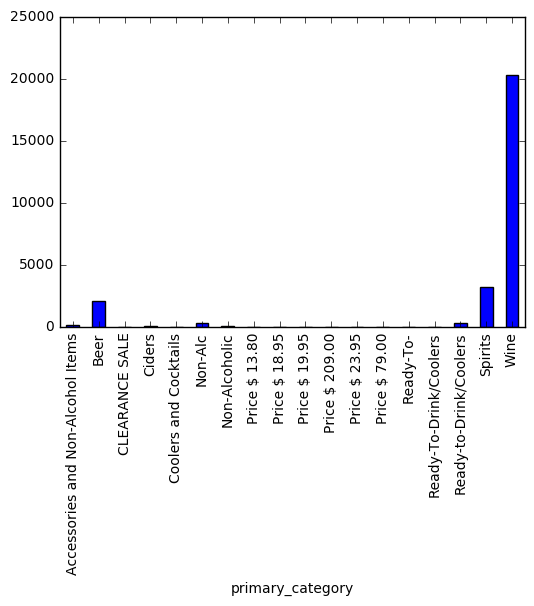

In [124]:
primary_categories['id'].plot(kind="bar")

Wow, there's some bad data in there. Now switching over to the data that Jen cleaned up with OpenRefine.